In [1]:
pip install --upgrade tensorflow-probability

In [2]:
pip install fredapi

In [3]:
from fredapi import Fred
import pandas_datareader as pdr
import numpy as np
import pandas as pd

In [4]:
pip install pandas_datareader

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow_probability as tfp
import tensorflow as tf

In [6]:
from statsmodels.tsa.seasonal import seasonal_decompose

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [7]:
fred=Fred(api_key='5b00d2114222da72aab563643d32fb11')

In [8]:
from datetime import date

In [9]:
start=date(2000,1,1)
end=date(2021,8,1)

In [10]:
df=pdr.DataReader('DHHNGSP','fred',start,end)

In [11]:
df.head()

,DHHNGSP
DATE,
2000-01-03,NaN
2000-01-04,2.16
2000-01-05,2.17
2000-01-06,2.18
2000-01-07,2.19


In [12]:
df=df.dropna()

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5429 entries, 2000-01-04 to 2021-07-30
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   DHHNGSP  5429 non-null   float64
dtypes: float64(1)
memory usage: 84.8 KB


Text(0, 0.5, 'price,$')

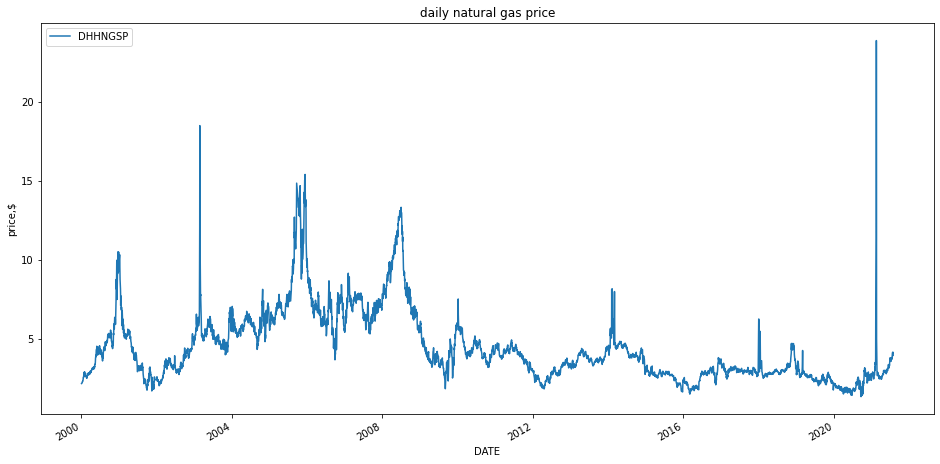

In [15]:
df.plot(figsize=(16,8))
plt.title('daily natural gas price')
plt.ylabel('price,$')

In [16]:
from statsmodels.tsa.stattools import adfuller

In [17]:
def adf_test(data):
    result=adfuller(data.values)
    print('ADF statistics: %f' %result[0])
    print('p-value : %f' % result[1])
    

In [18]:
adf_test(df['DHHNGSP'])

ADF statistics: -3.883613
p-value : 0.002159


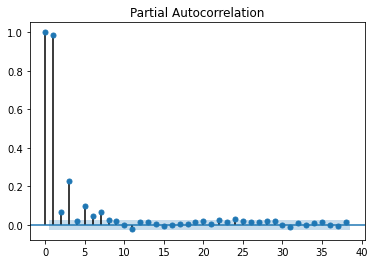

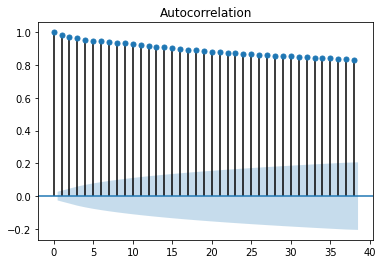

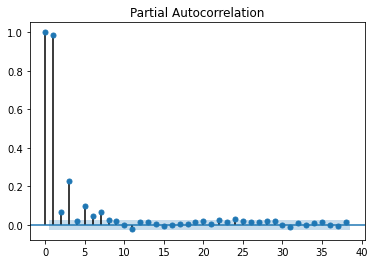

In [21]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(df)
plot_pacf(df)

In [22]:
df_diff=df.diff(periods=1).iloc[1:]

In [ ]:
df_diff.head()

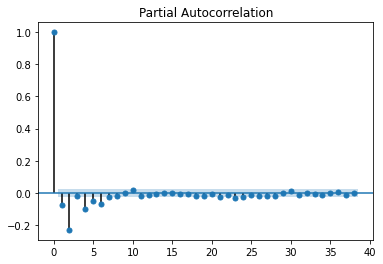

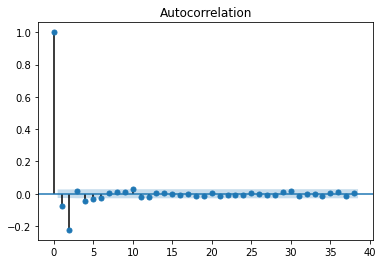

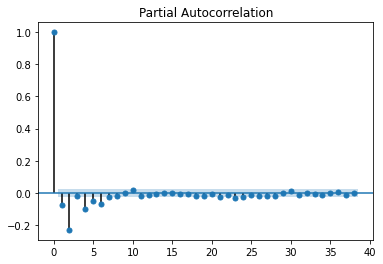

In [26]:
plot_acf(df_diff)
plot_pacf(df_diff)

In [27]:
from statsmodels.tsa.arima_model import ARIMA

In [28]:
model=ARIMA(df, order=(0,0,1))

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [29]:
model_fit=model.fit(trend='c',full_output=True, disp=1)
print(model_fit.summary())

                              ARMA Model Results                              
Dep. Variable:                DHHNGSP   No. Observations:                 5429
Model:                     ARMA(0, 1)   Log Likelihood               -8805.125
Method:                       css-mle   S.D. of innovations              1.225
Date:                Thu, 26 Aug 2021   AIC                          17616.250
Time:                        11:41:35   BIC                          17636.049
Sample:                             0   HQIC                         17623.160
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             4.3963      0.032    138.940      0.000       4.334       4.458
ma.L1.DHHNGSP     0.9037      0.004    219.020      0.000       0.896       0.912
                                    Root

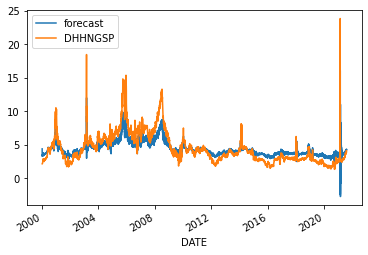

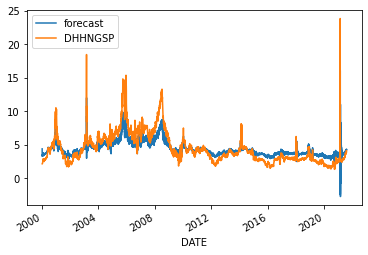

In [30]:
model_fit.plot_predict()